
Feature selection for target column: Biopsy


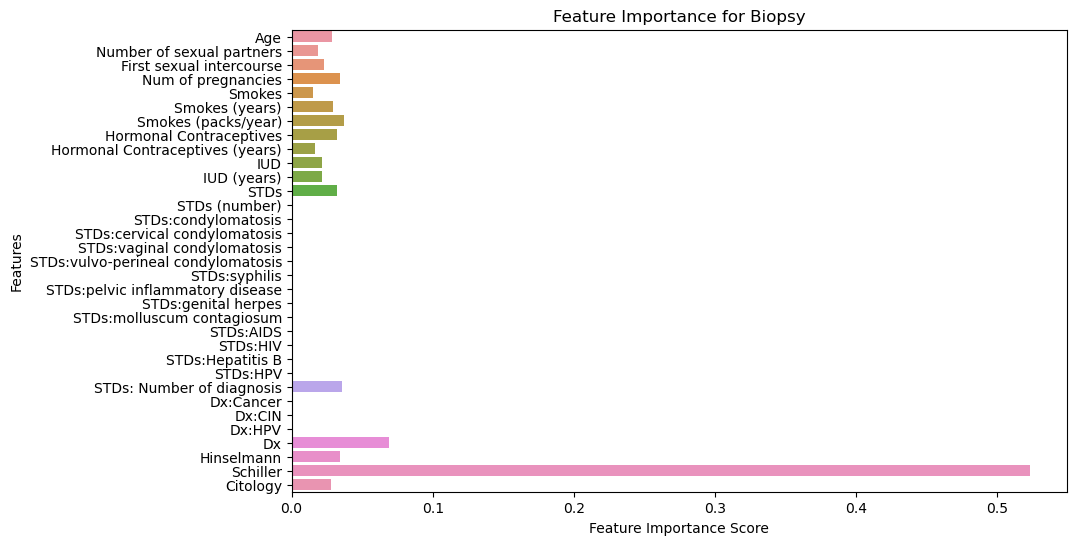

In [10]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import pandas as pd

# Load the dataset
data = pd.read_csv("C:/Users/IT BD/Desktop/Research Paper/Cervical Cancer/Null_Value_Handled_cervical-cancer.csv")

# Define the target columns
target_columns = ['Biopsy']

# Iterate over each target column
for target_column in target_columns:
    print(f"\nFeature selection for target column: {target_column}")

    # Separate features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Encode target variable if it's categorical
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Step 2: Feature Selection using XGBoost
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train, y_train)

    # Get feature importances
    feature_importances_xgb = xgb_model.feature_importances_

    # Sort features by importance
    sorted_indices_xgb = feature_importances_xgb.argsort()[::-1]
    selected_features_xgb = X.columns[sorted_indices_xgb]

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances_xgb, y=X.columns)
    plt.title(f"Feature Importance for {target_column}")
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.show()


In [8]:
# Step 2: Feature Selection using XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Get feature importances
feature_importances_xgb = xgb_model.feature_importances_

# Sort features by importance
sorted_indices_xgb = feature_importances_xgb.argsort()[::-1]
selected_features_xgb = X.columns[sorted_indices_xgb]

# Print feature importance scores rounded to 4 decimal places
for i, feature in enumerate(selected_features_xgb):
    importance_score = "{:.7f}".format(feature_importances_xgb[sorted_indices_xgb[i]])
    print(f"Feature: {feature}, Importance Score: {importance_score}")



Feature: Schiller, Importance Score: 0.5231602
Feature: Dx, Importance Score: 0.0689445
Feature: Smokes (packs/year), Importance Score: 0.0374364
Feature: STDs: Number of diagnosis, Importance Score: 0.0357808
Feature: Hinselmann, Importance Score: 0.0339904
Feature: Num of pregnancies, Importance Score: 0.0339259
Feature: Hormonal Contraceptives, Importance Score: 0.0323515
Feature: STDs, Importance Score: 0.0318074
Feature: Smokes (years), Importance Score: 0.0290621
Feature: Age, Importance Score: 0.0289111
Feature: Citology, Importance Score: 0.0281895
Feature: First sexual intercourse, Importance Score: 0.0230789
Feature: IUD, Importance Score: 0.0215341
Feature: IUD (years), Importance Score: 0.0212963
Feature: Number of sexual partners, Importance Score: 0.0188654
Feature: Hormonal Contraceptives (years), Importance Score: 0.0162878
Feature: Smokes, Importance Score: 0.0153777
Feature: STDs:molluscum contagiosum, Importance Score: 0.0000000
Feature: Dx:HPV, Importance Score: 0.0

In [9]:
# Step 2: Feature Selection using XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Get feature importances
feature_importances_xgb = xgb_model.feature_importances_

# Sort features by importance
sorted_indices_xgb = feature_importances_xgb.argsort()[::-1]
selected_features_xgb = X.columns[sorted_indices_xgb]

# Print feature importance scores
for i, feature in enumerate(selected_features_xgb):
    importance_score = round(feature_importances_xgb[sorted_indices_xgb[i]] * 100, 4)
    print(f"Feature: {feature}, Importance Score: {importance_score}")


Feature: Schiller, Importance Score: 52.316
Feature: Dx, Importance Score: 6.8945
Feature: Smokes (packs/year), Importance Score: 3.7436
Feature: STDs: Number of diagnosis, Importance Score: 3.5781
Feature: Hinselmann, Importance Score: 3.399
Feature: Num of pregnancies, Importance Score: 3.3926
Feature: Hormonal Contraceptives, Importance Score: 3.2351
Feature: STDs, Importance Score: 3.1807
Feature: Smokes (years), Importance Score: 2.9062
Feature: Age, Importance Score: 2.8911
Feature: Citology, Importance Score: 2.819
Feature: First sexual intercourse, Importance Score: 2.3079
Feature: IUD, Importance Score: 2.1534
Feature: IUD (years), Importance Score: 2.1296
Feature: Number of sexual partners, Importance Score: 1.8865
Feature: Hormonal Contraceptives (years), Importance Score: 1.6288
Feature: Smokes, Importance Score: 1.5378
Feature: STDs:molluscum contagiosum, Importance Score: 0.0
Feature: Dx:HPV, Importance Score: 0.0
Feature: Dx:CIN, Importance Score: 0.0
Feature: Dx:Cancer,